In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Run experiments

cd OPTWIN_PATH/Moa-Experiments/scripts/

./classification_experiments.sh

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
OPTWIN_PATH = "" #<-- DEFINE OPTWIN PATH
RESULT_FILE1 = OPTWIN_PATH+"/MOA-Experiments/results/nb_results/"
RESULT_FILE1 += "naive_bayes_Covertype_"
RESULT_FILE2 = ".csv"

In [4]:
def plot_drifts(method, df, drifts_identified):
    df['classifications_correct_(percent)']
    
    plt.figure()
    plt.title(method)
    plt.ylabel('Accuracy') 
    plt.xlabel('Stream datapoints') 
    
    for tp in drifts_identified:
        plt.vlines(tp, 0, 85, colors = "blue", linewidth=0.5, linestyles = "dashed")
        #plt.text(d+500, 80, "Drift", c = "blue", fontsize = 10)
    
    if len(drifts_identified) > 0 : plt.vlines(drifts_identified[0], 0, 85, colors = "blue", linewidth=0.5, linestyles = "dashed", label = "Drifts Identified")

    plt.legend()

    df['classifications_correct_(percent)'].plot()

In [5]:
def identify_metrics(method):  
    output = {}
    output['method'] = method
    #open n_itt results
    drift_detection = []
    RESULT_FILE = RESULT_FILE1+method+RESULT_FILE2
    df = pd.read_csv(RESULT_FILE, low_memory=False)
    df.columns = [c.replace(' ', '_') for c in df.columns] #remove spaces from column names
    
    df = df.drop('Kappa_Statistic_(percent)', axis=1) #remove unused statistic
    df = df.drop('Kappa_Temporal_Statistic_(percent)', axis=1) #remove unused statistic
    df = df.drop('Kappa_M_Statistic_(percent)', axis=1) #remove unused statistic

    output['accuracy'] = df['classifications_correct_(percent)'][len(df.index)-1]
    output['cpu'] = df['evaluation_time_(cpu_seconds)'][len(df.index)-1]
    output['ram']  = df['model_cost_(RAM-Hours)'][len(df.index)-1]
    output['drifts'] = df['Change_detected'].sum()
    
    drifts_identified = df['Change_detected'].eq(1).index[df['Change_detected'].eq(1)].tolist()
    
    plot_drifts(method, df, drifts_identified)
    
    return output

### OPTWIN -r 0.1

{'method': '(OPTWIN-r0.1)',
 'accuracy': 83.2893296523996,
 'cpu': 1560.806546,
 'ram': 3.636602282068804e-06,
 'drifts': 1454.0}

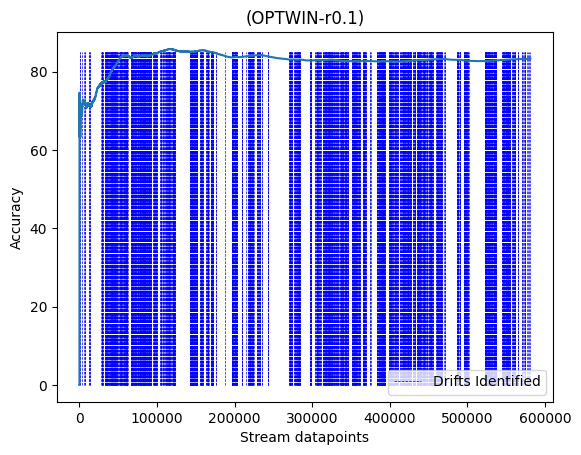

In [6]:
method = "(OPTWIN-r0.1)"
optwin01_output = identify_metrics(method)
optwin01_output

### OPTWIN -r 0.5

{'method': '(OPTWIN-r0.5)',
 'accuracy': 85.63454799556635,
 'cpu': 1548.188431,
 'ram': 3.603941795213546e-06,
 'drifts': 2867.0}

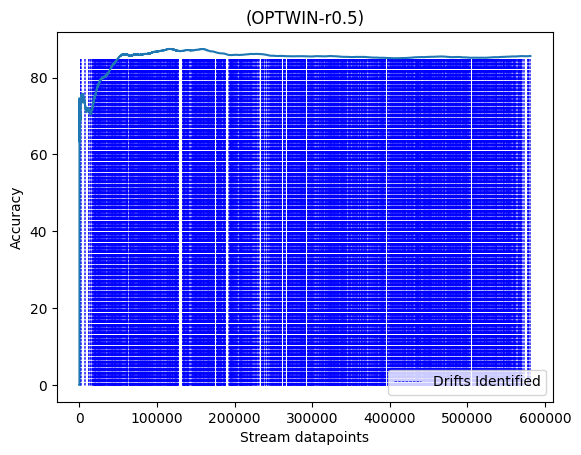

In [7]:
method = "(OPTWIN-r0.5)"
optwin05_output = identify_metrics(method)
optwin05_output

### OPTWIN -r 1.0

{'method': '(OPTWIN-r1.0)',
 'accuracy': 86.30837228835205,
 'cpu': 1534.550417,
 'ram': 3.572463483084043e-06,
 'drifts': 3228.0}

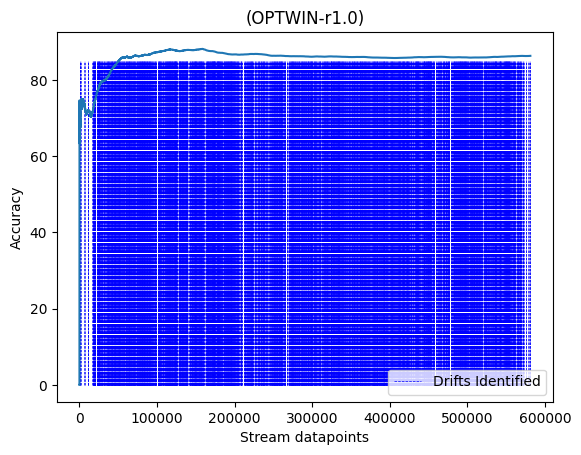

In [8]:
method = "(OPTWIN-r1.0)"
optwin10_output = identify_metrics(method)
optwin10_output

### ADWIN

{'method': 'ADWINChangeDetector',
 'accuracy': 82.4946816933213,
 'cpu': 1266.798446,
 'ram': 2.840462959487302e-06,
 'drifts': 741.0}

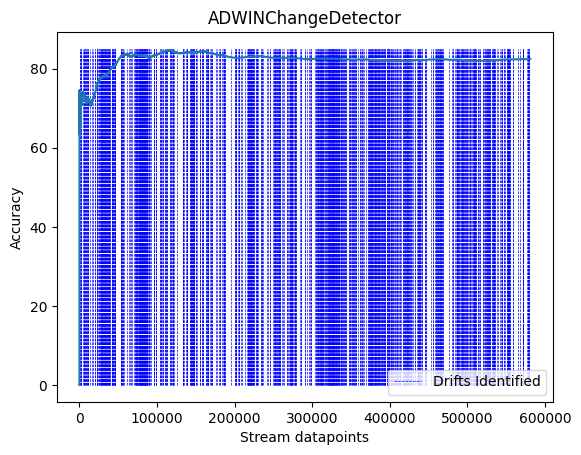

In [9]:
method = "ADWINChangeDetector"
adwin_output = identify_metrics(method)
adwin_output

### DDM

{'method': 'DDM',
 'accuracy': 88.02606486613013,
 'cpu': 1233.211603,
 'ram': 2.438444554087675e-06,
 'drifts': 4634.0}

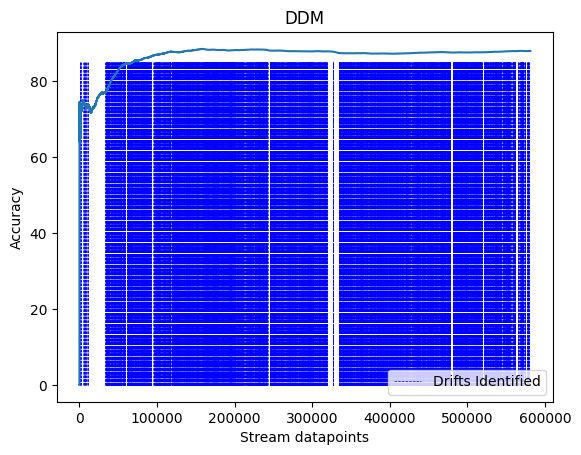

In [10]:
method = "DDM"
ddm_output = identify_metrics(method)
ddm_output

### EDDM

{'method': 'EDDM',
 'accuracy': 86.0818709424246,
 'cpu': 1201.071889,
 'ram': 2.2184230804319035e-06,
 'drifts': 2416.0}

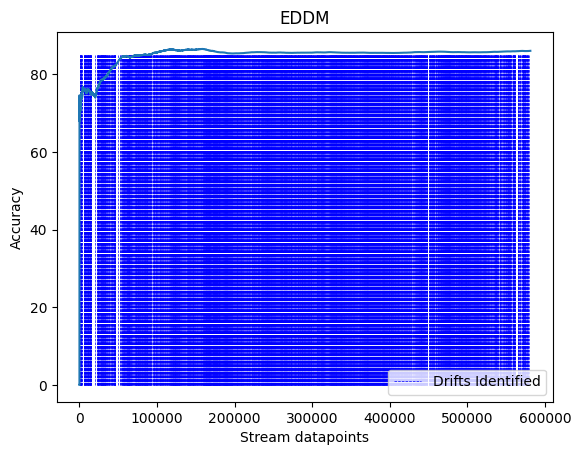

In [11]:
method = "EDDM"
eddm_output = identify_metrics(method)
eddm_output

### STEPD

{'method': 'STEPD',
 'accuracy': 87.52814055475618,
 'cpu': 1242.170622,
 'ram': 2.4908058306243197e-06,
 'drifts': 3731.0}

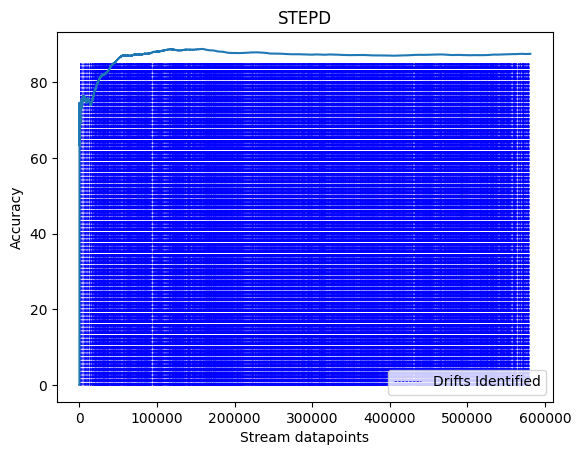

In [12]:
method = "STEPD"
stepd_output = identify_metrics(method)
stepd_output

### EWMAChartDM

{'method': 'EWMAChartDM',
 'accuracy': 90.1631980062374,
 'cpu': 1251.805634,
 'ram': 2.410100071798593e-06,
 'drifts': 6435.0}

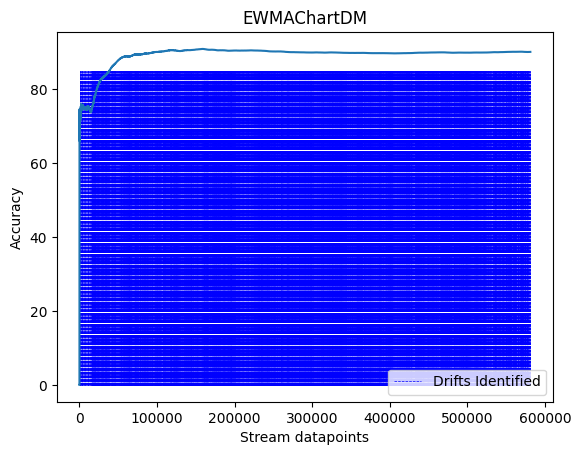

In [13]:
method = "EWMAChartDM"
EWMAChartDM_output = identify_metrics(method)
EWMAChartDM_output

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'method': 'moa.classifiers.rules.core.changedetection.NoChangeDetection',
 'accuracy': 60.5207809821484,
 'cpu': 1240.115214,
 'ram': 2.2662572516336715e-06,
 'drifts': 0.0}

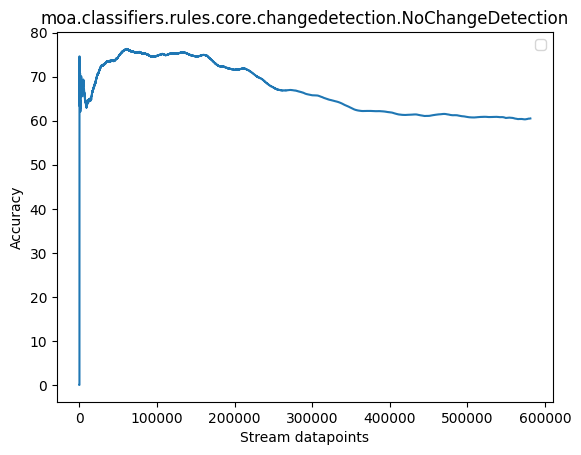

In [16]:
method = "moa.classifiers.rules.core.changedetection.NoChangeDetection"
stepd_output = identify_metrics(method)
stepd_output